# Feature Engineering

In [1]:
# Test which scaling & transforming to use

In [2]:
# ----------------------------------
# IMPORTS
#-----------------------------------

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
plt.style.use('ggplot')

import sys
sys.path.insert(0, "../02_src")

import data_exploration #visualizations

from sklearn.preprocessing import RobustScaler, StandardScaler, PowerTransformer, QuantileTransformer

In [3]:
df = pd.read_csv("../00_data/1_interim/knnimputed.csv")
df_full = pd.read_csv("../00_data/1_interim/filtered_data_01.csv")
df_features = df.drop(columns=["child_mortality_igme"])

regions = pd.read_csv("../00_data/1_interim/world-regions-worldbank.csv")

In [4]:
world_regions = regions[["Entity", "World regions according to WB"]]

In [5]:
df_full_imp = df.copy()
df_full_imp[["Code", "Entity", "Year"]] = df_full[["Code", "Entity", "Year"]]

In [6]:
cut_offs = df_full_imp["child_mortality_igme"].quantile([0.25, 0.5, 0.75])
cut_offs

0.25     7.683157
0.50    18.121254
0.75    47.405209
Name: child_mortality_igme, dtype: float64

In [7]:
df_sorted = df_full_imp.sort_values("child_mortality_igme")
top_25_percent_count = int(len(df_sorted) * 0.25)
print(df_sorted[["Entity", "child_mortality_igme"]].head(top_25_percent_count))

                    Entity  child_mortality_igme
893             San Marino              1.749197
892             San Marino              1.833197
891             San Marino              1.930128
890             San Marino              2.029155
889             San Marino              2.142008
...                    ...                   ...
989              Sri Lanka              7.563998
905           Saudi Arabia              7.613345
75                 Bahrain              7.641866
76                 Bahrain              7.652903
1094  United Arab Emirates              7.656361

[289 rows x 2 columns]


#### Which countries under which percentile in target?

In [8]:
df_full_imp["u5mr_quant"] = pd.qcut(df_full_imp["child_mortality_igme"], q=4, labels=["Q1", "Q2", "Q3", "Q4"])
print(df_full_imp[df_full_imp["u5mr_quant"] == "Q1"]["Entity"].unique())

['Andorra' 'Australia' 'Austria' 'Bahrain' 'Belarus' 'Belgium'
 'Bosnia and Herzegovina' 'Bulgaria' 'Canada' 'Chile' 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' 'Denmark' 'Estonia' 'Finland' 'France' 'Germany'
 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Malta' 'Monaco' 'Montenegro' 'Netherlands'
 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Qatar' 'Romania' 'Russia'
 'San Marino' 'Saudi Arabia' 'Serbia' 'Singapore' 'Slovakia' 'Slovenia'
 'South Korea' 'Spain' 'Sri Lanka' 'Sweden' 'Switzerland'
 'United Arab Emirates' 'United Kingdom' 'United States']


In [9]:
print(df_full_imp[df_full_imp["u5mr_quant"] == "Q2"]["Entity"].unique())

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Bahamas' 'Bahrain'
 'Barbados' 'Belize' 'Brazil' 'Brunei' 'Bulgaria' 'Cape Verde' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Ecuador' 'El Salvador' 'Georgia'
 'Grenada' 'Iran' 'Jordan' 'Kazakhstan' 'Kuwait' 'Lebanon' 'Libya'
 'Malaysia' 'Maldives' 'Mauritius' 'Mexico' 'Moldova' 'Mongolia' 'Nauru'
 'Nicaragua' 'North Macedonia' 'Oman' 'Palestine' 'Panama' 'Peru' 'Qatar'
 'Romania' 'Russia' 'Saint Lucia' 'Saint Vincent and the Grenadines'
 'Samoa' 'Sao Tome and Principe' 'Saudi Arabia' 'Seychelles' 'Sri Lanka'
 'Thailand' 'Tonga' 'Tunisia' 'Turkey' 'Ukraine' 'United Arab Emirates'
 'Uruguay' 'Uzbekistan' 'Vanuatu' 'Venezuela']


In [10]:
print(df_full_imp[df_full_imp["u5mr_quant"] == "Q3"]["Entity"].unique())

['Algeria' 'Azerbaijan' 'Bangladesh' 'Bhutan' 'Bolivia' 'Botswana'
 'Cambodia' 'Cape Verde' 'Comoros' 'Dominica' 'Dominican Republic' 'Egypt'
 'Eritrea' 'Fiji' 'Gabon' 'Ghana' 'Grenada' 'Guatemala' 'Guyana'
 'Honduras' 'India' 'Indonesia' 'Iraq' 'Jamaica' 'Kenya' 'Kyrgyzstan'
 'Laos' 'Marshall Islands' 'Mauritania' 'Micronesia (country)' 'Mongolia'
 'Morocco' 'Myanmar' 'Nauru' 'Nepal' 'Nicaragua' 'North Korea' 'Palau'
 'Palestine' 'Papua New Guinea' 'Paraguay' 'Peru' 'Philippines' 'Rwanda'
 'Saint Kitts and Nevis' 'Saint Vincent and the Grenadines' 'Samoa'
 'Sao Tome and Principe' 'Solomon Islands' 'South Africa' 'Suriname'
 'Syria' 'Tajikistan' 'Trinidad and Tobago' 'Tunisia' 'Turkmenistan'
 'Tuvalu' 'Uganda' 'Uzbekistan' 'Vanuatu' 'Venezuela' 'Vietnam' 'Yemen']


In [11]:
print(df_full_imp[df_full_imp["u5mr_quant"] == "Q4"]["Entity"].unique())

['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo'
 "Cote d'Ivoire" 'Democratic Republic of Congo' 'Djibouti' 'East Timor'
 'Equatorial Guinea' 'Eritrea' 'Eswatini' 'Ethiopia' 'Gambia' 'Ghana'
 'Guinea' 'Guinea-Bissau' 'Haiti' 'India' 'Kenya' 'Kiribati' 'Laos'
 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mauritania'
 'Mozambique' 'Myanmar' 'Namibia' 'Niger' 'Nigeria' 'Pakistan'
 'Papua New Guinea' 'Rwanda' 'Senegal' 'Sierra Leone' 'Somalia'
 'South Sudan' 'Sudan' 'Tanzania' 'Togo' 'Uganda' 'Yemen' 'Zambia'
 'Zimbabwe']


### original distributions

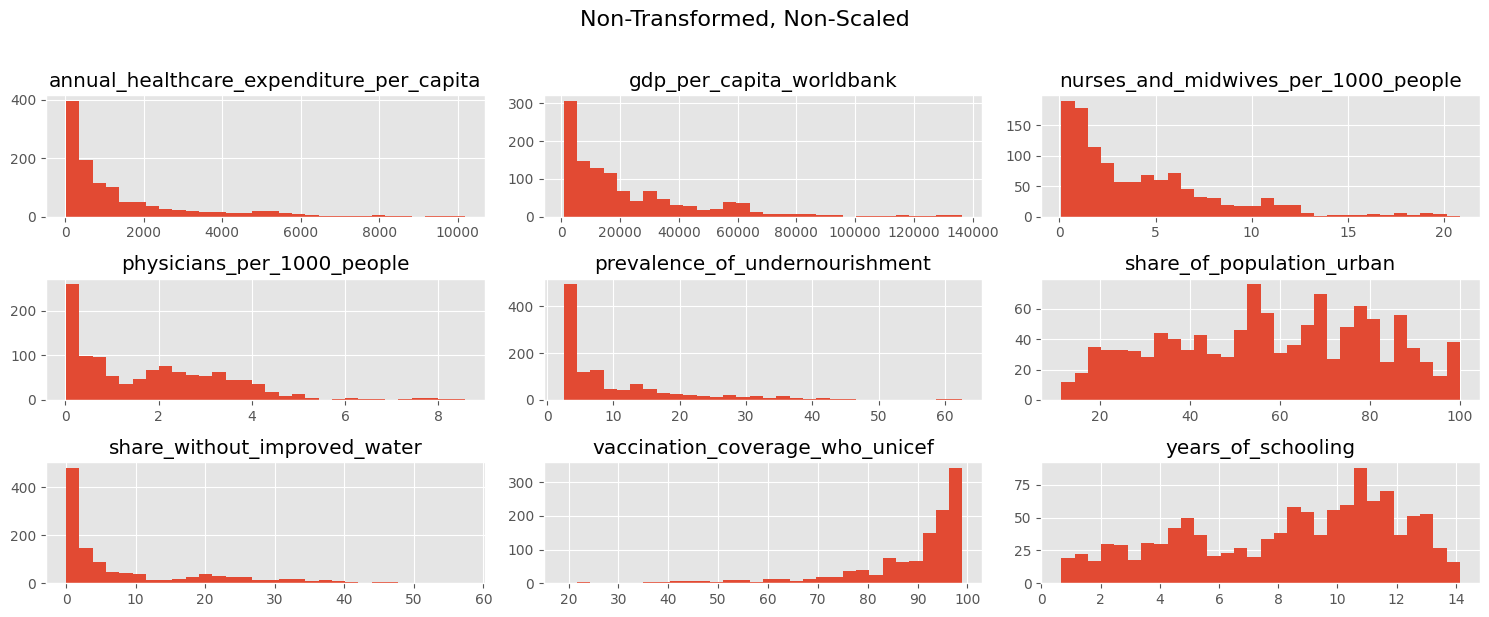

In [12]:
# ----------------------------------
# ORIGINAL DISTRIBUTIONS
#-----------------------------------
df_features.hist(bins=30, figsize=(15, 6))
plt.suptitle("Non-Transformed, Non-Scaled", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

### only log1p 

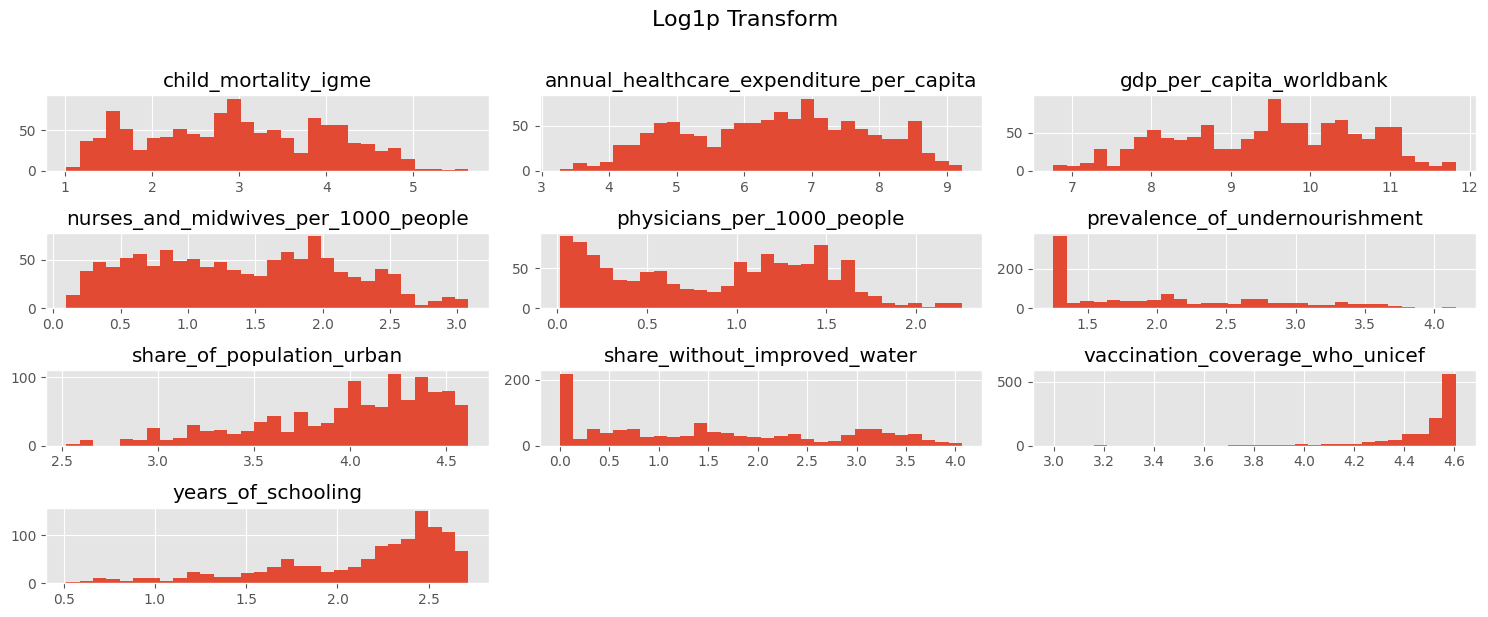

In [13]:
# ----------------------------------
# only log1p 
#-----------------------------------
df_test0 = df.copy()

log_df = np.log1p(df_test0)

df_transformed0 = pd.DataFrame(
    log_df,
    columns=df_test0.columns
)

df_transformed0.hist(bins=30, figsize=(15, 6))
plt.suptitle("Log1p Transform", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

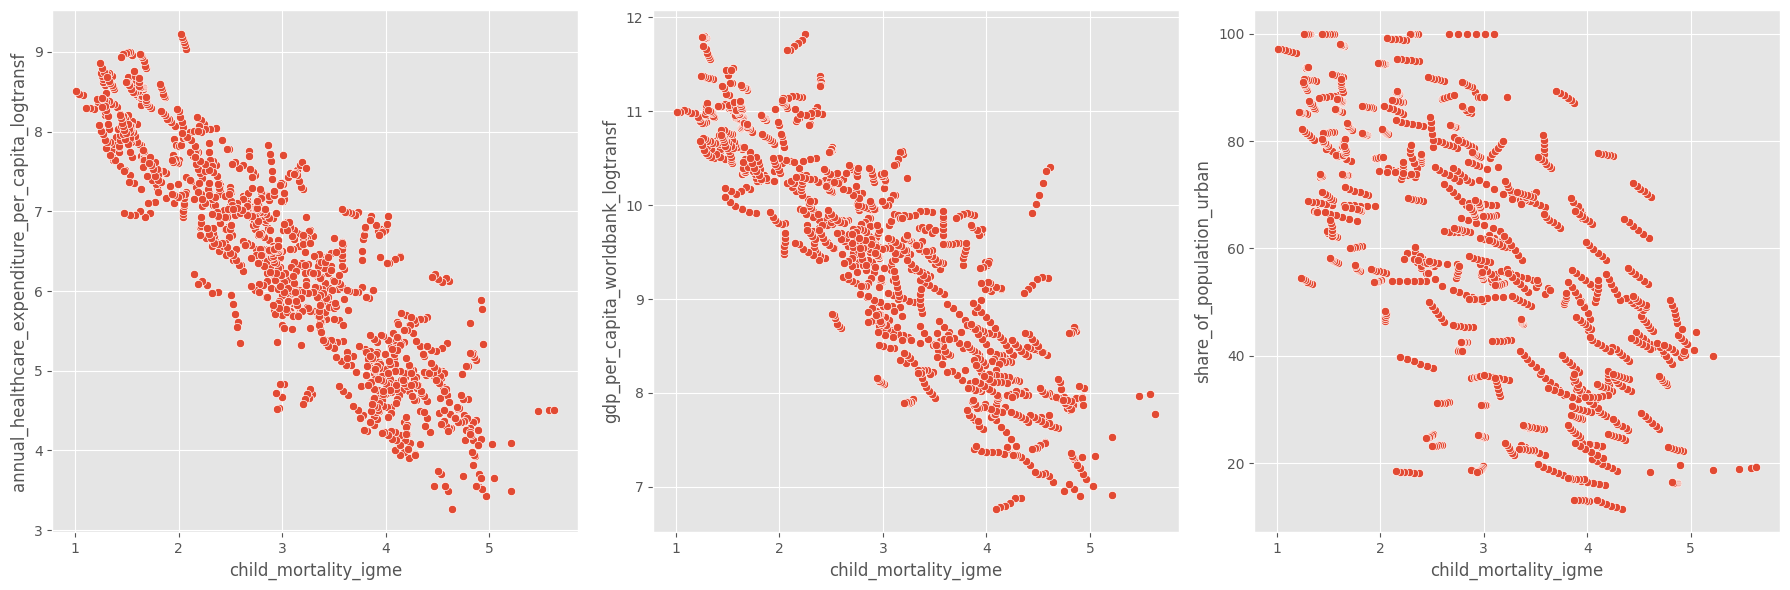

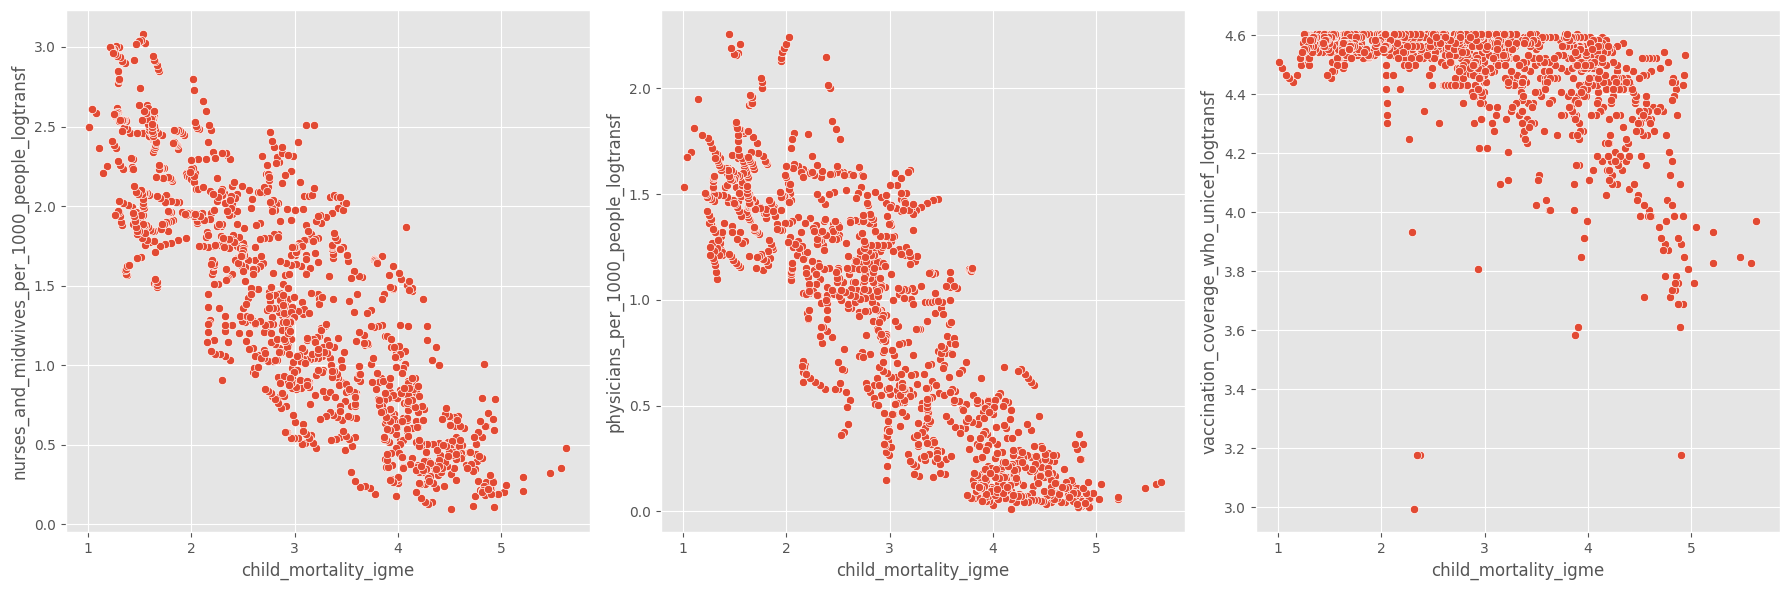

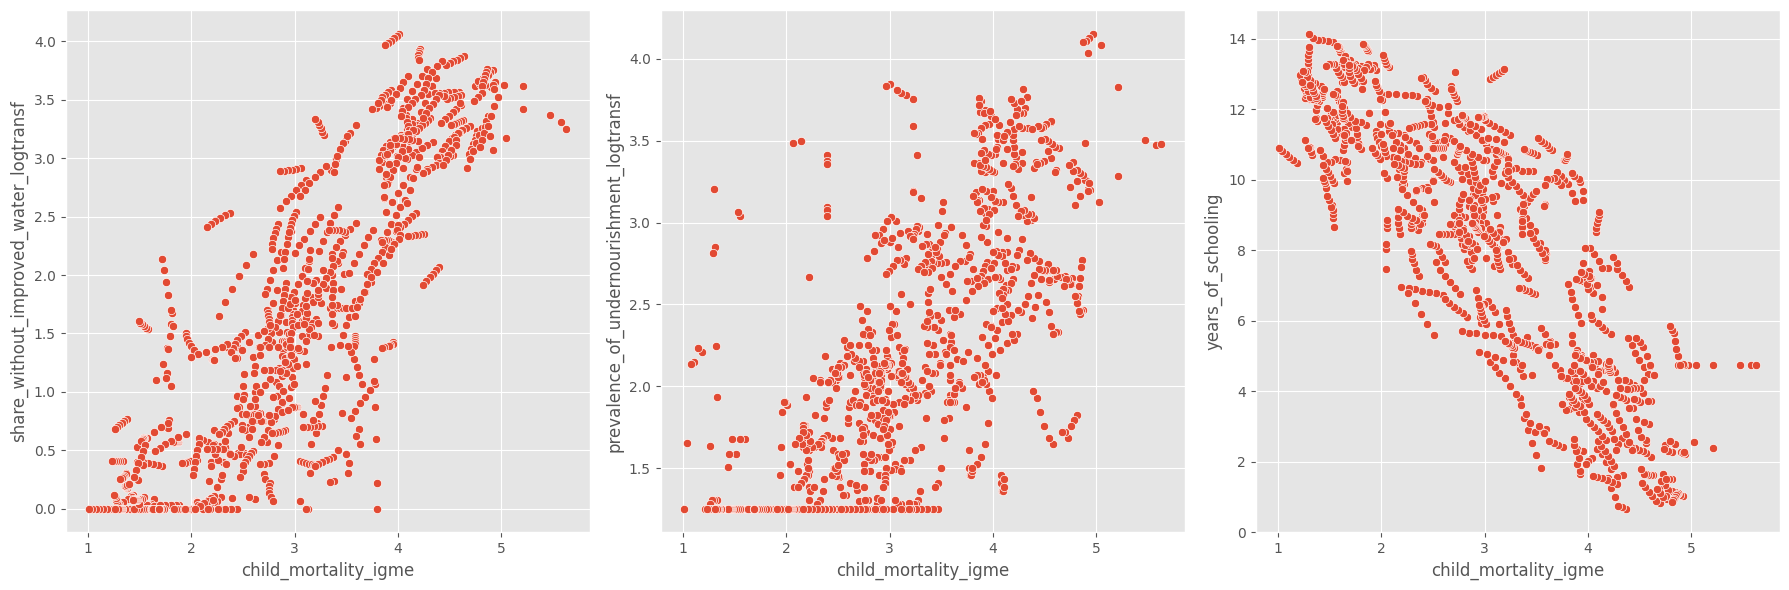

In [14]:
logtr = df_transformed0.add_suffix('_logtransf')
rel_logtr = pd.concat([df_features, logtr], axis=1)

def scatterplots_tr(df, features, cols_num):
    fig, axs = plt.subplots(ncols=cols_num, figsize=(18, 6))
    for id, a in enumerate(axs):
        sns.scatterplot(data=df, x=df_transformed0["child_mortality_igme"], y=features[id], ax=axs[id])
    plt.tight_layout()
    plt.show()

scatterplots_tr(rel_logtr, ["annual_healthcare_expenditure_per_capita_logtransf", "gdp_per_capita_worldbank_logtransf", "share_of_population_urban"], 3)
scatterplots_tr(rel_logtr, ["nurses_and_midwives_per_1000_people_logtransf", "physicians_per_1000_people_logtransf", "vaccination_coverage_who_unicef_logtransf"], 3)
scatterplots_tr(rel_logtr, ["share_without_improved_water_logtransf", "prevalence_of_undernourishment_logtransf", "years_of_schooling"], 3)

### log1p + StandardScaler

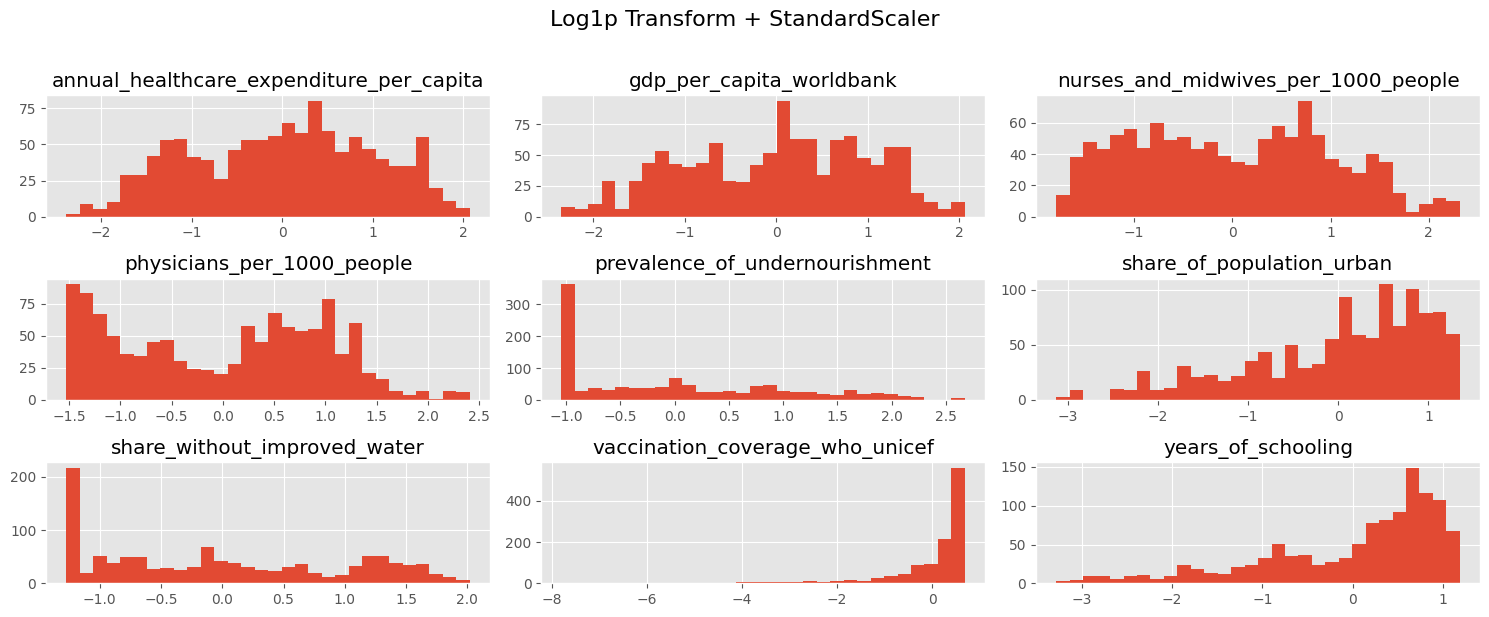

In [15]:
# ----------------------------------
# log1p + StandardScaler
#-----------------------------------
df_test1 = df_features.copy()

log_transform_df_test1 = np.log1p(df_test1)

scaler1 = StandardScaler()
scale_data1 = scaler1.fit_transform(log_transform_df_test1)

df_transformed1 = pd.DataFrame(
    scale_data1,
    columns=df_test1.columns
)

df_transformed1.hist(bins=30, figsize=(15, 6))
plt.suptitle("Log1p Transform + StandardScaler", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

### log1p + RobustScaler

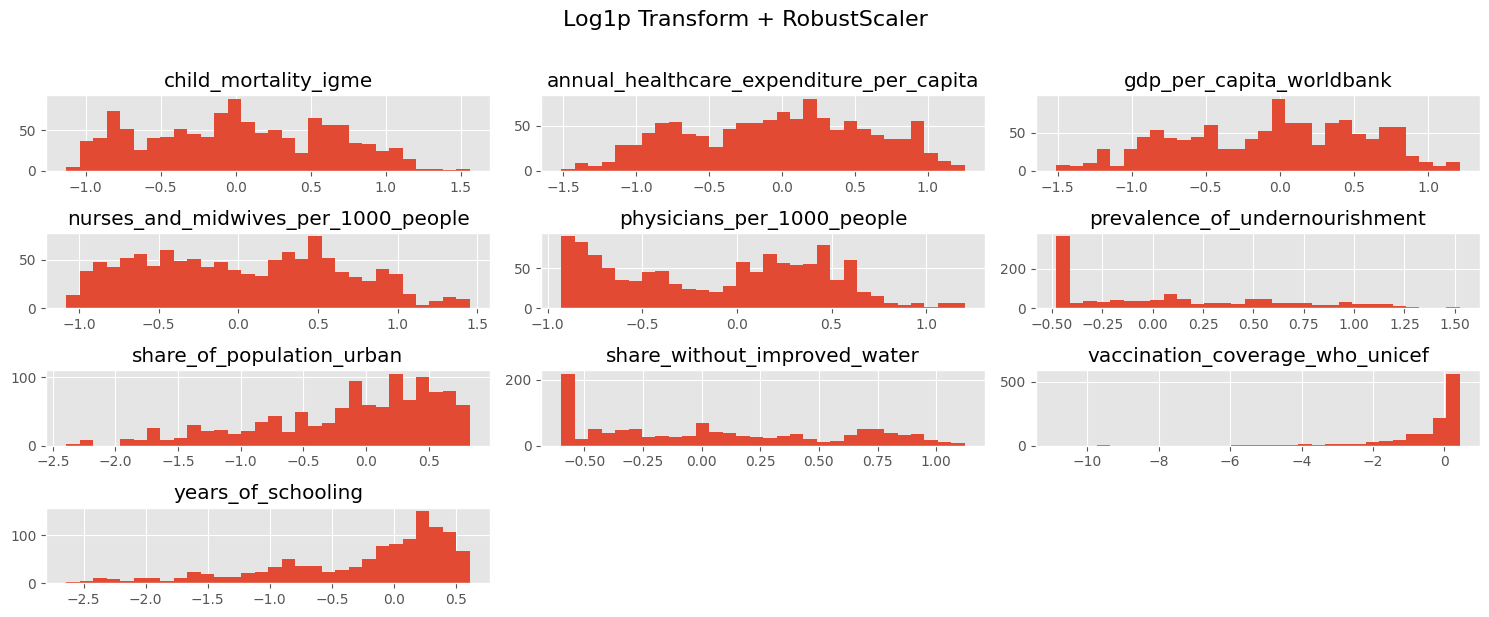

In [16]:
# ----------------------------------
# log1p + RobustScaler
#-----------------------------------
df_test2 = df.copy()

log_transform_df_test2 = np.log1p(df_test2)

scaler2 = RobustScaler()
scale_data2 = scaler2.fit_transform(log_transform_df_test2)

df_transformed2 = pd.DataFrame(
    scale_data2,
    columns=df_test2.columns
)

df_transformed2.hist(bins=30, figsize=(15, 6))
plt.suptitle("Log1p Transform + RobustScaler", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

### PowerTransformer + StandardScaler

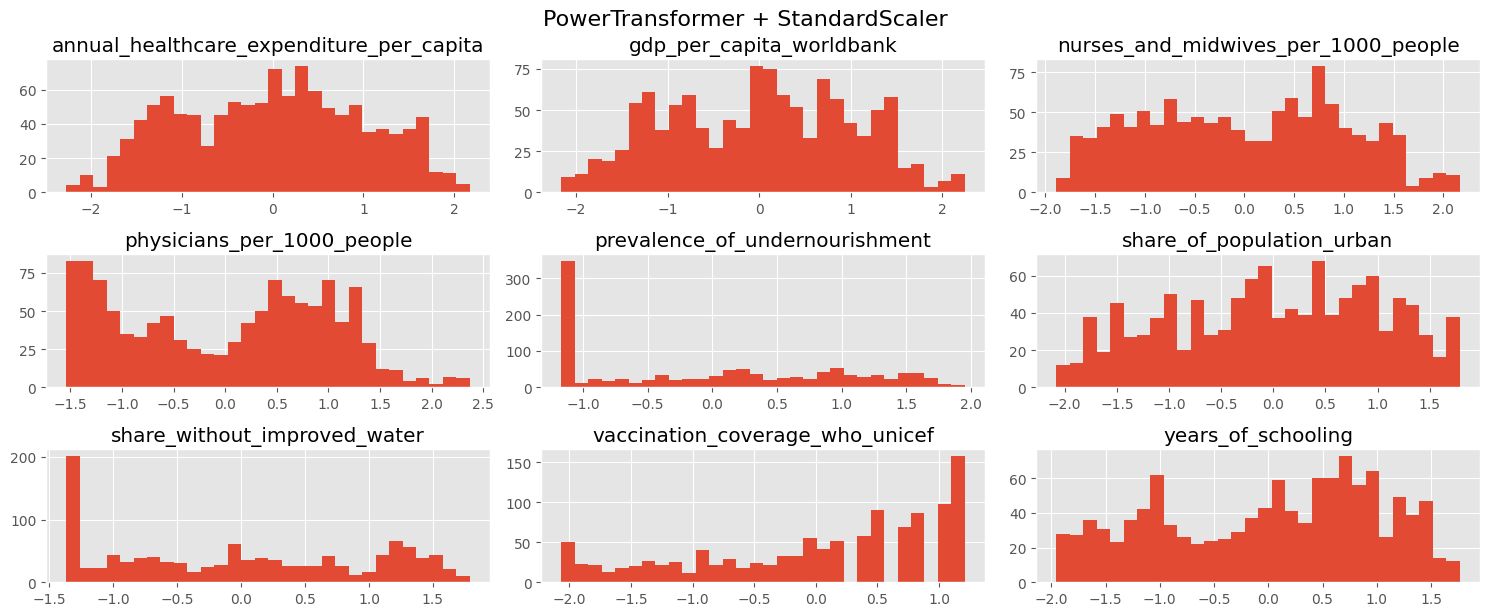

In [11]:
# ----------------------------------
# PowerTransformer + StandardScaler
#-----------------------------------
df_test3 = df_features.copy()

power_transform_df_test3 = PowerTransformer() #uses StandardScaler intern default
df_test3_transformed = power_transform_df_test3.fit_transform(df_test3)

#scaler3 = StandardScaler()
#scale_data3 = scaler3.fit_transform(df_test3_transformed)

df_transformed3 = pd.DataFrame(
    df_test3_transformed,
    columns=df_test3.columns
)

df_transformed3.hist(bins=30, figsize=(15, 6))
plt.tight_layout()
plt.suptitle("PowerTransformer + StandardScaler", fontsize=16, y=1.02)
plt.show()

### PowerTransformer + RobustSclaer

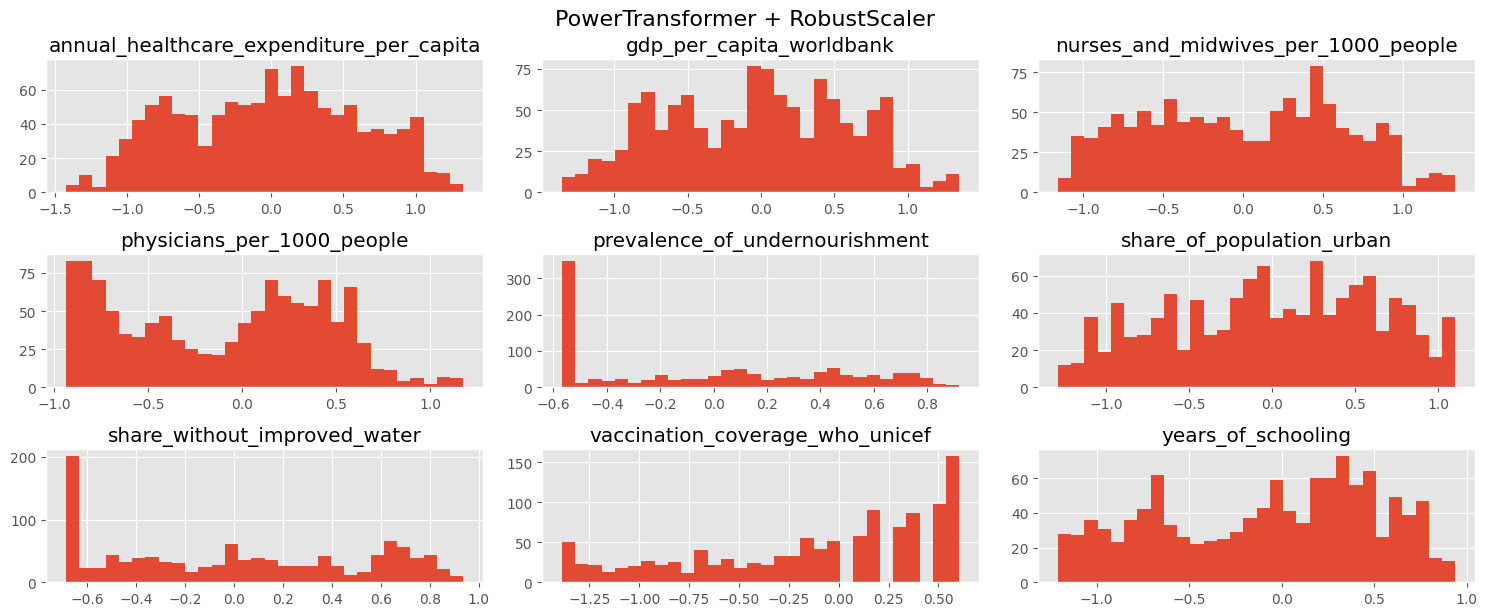

In [17]:
# ----------------------------------
# PowerTransformer + RobustSclaer
#-----------------------------------
df_test4 = df_features.copy()

power_transform_df_test4 = PowerTransformer() 
df_test4_transformed = power_transform_df_test4.fit_transform(df_test4)

scaler4 = RobustScaler()
scale_data4 = scaler4.fit_transform(df_test4_transformed)

df_transformed4 = pd.DataFrame(
    scale_data4,
    columns=df_test4.columns
)

df_transformed4.hist(bins=30, figsize=(15, 6))
plt.tight_layout()
plt.suptitle("PowerTransformer + RobustScaler", fontsize=16, y=1.02)
plt.show()

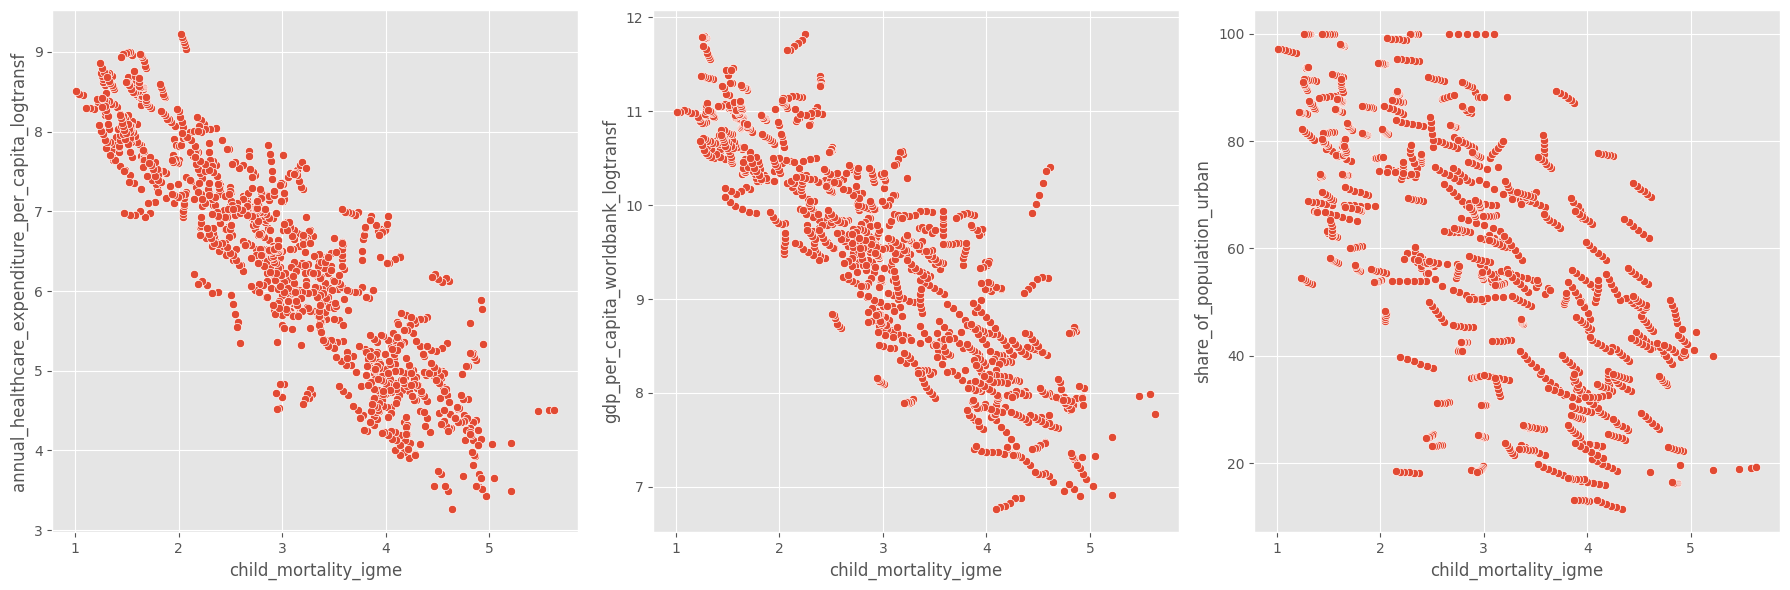

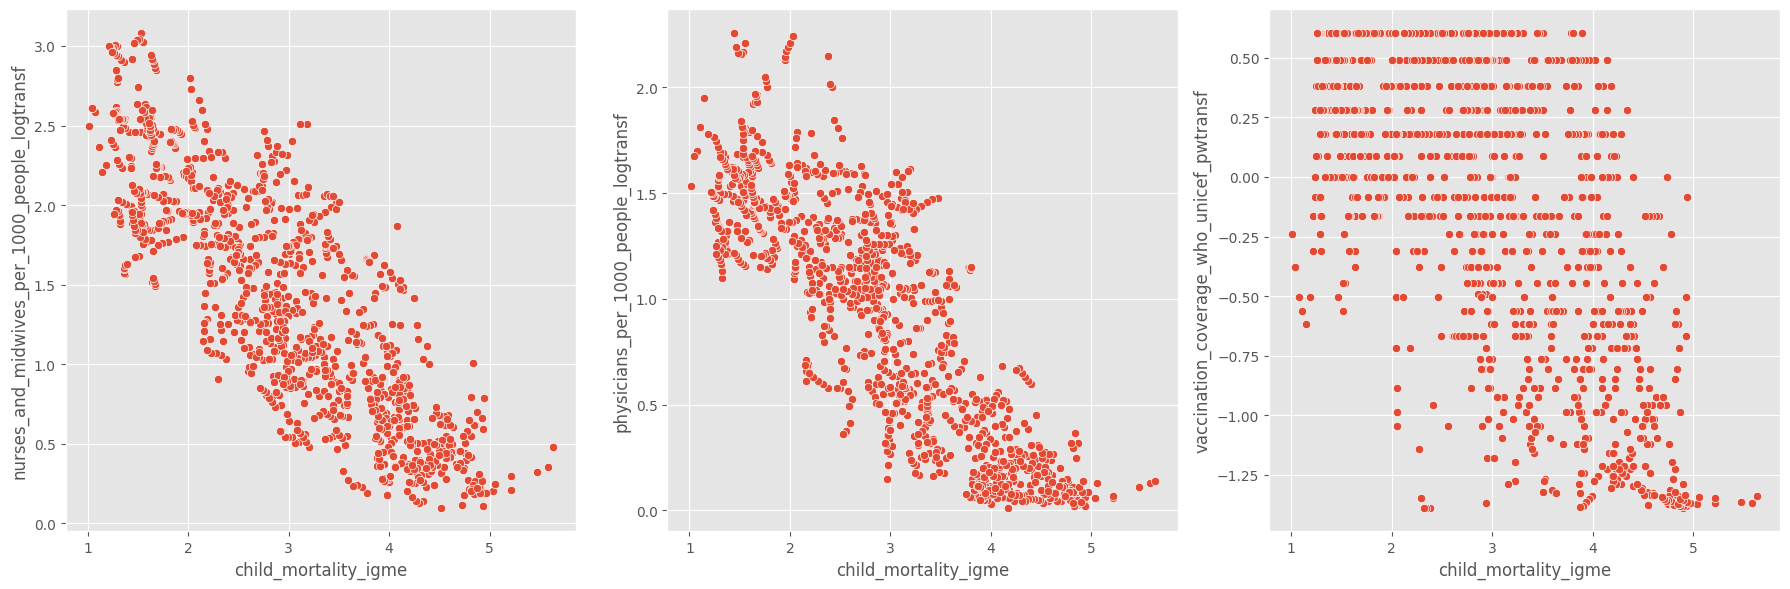

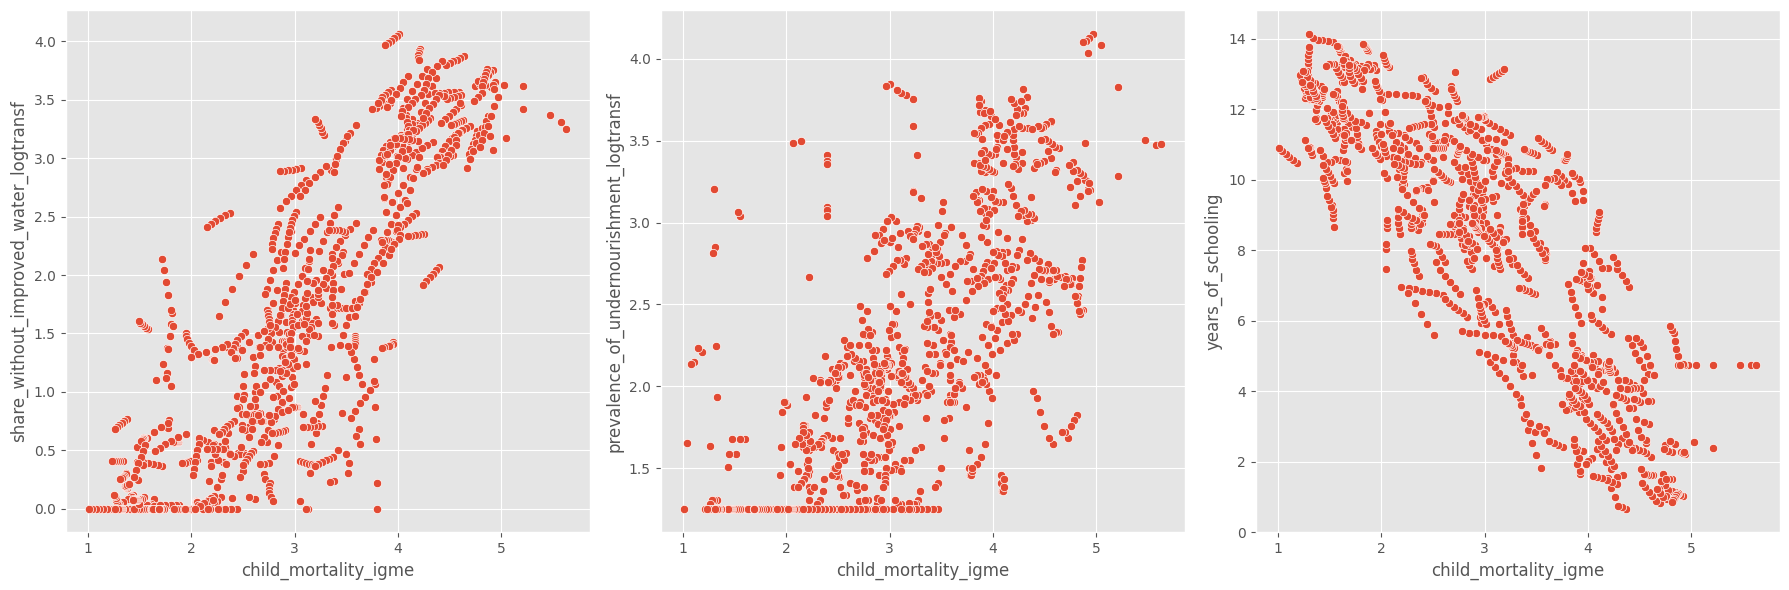

In [18]:
# ----------------------------------
# Show Features - Target Relationship 
# After Log-Transform / powertransf + RobustScale
#-----------------------------------
powertr_df = df_transformed4.add_suffix('_pwtransf')
rel_pwtr = pd.concat([rel_logtr, powertr_df], axis=1)

def scatterplots_tr(df, features, cols_num):
    fig, axs = plt.subplots(ncols=cols_num, figsize=(18, 6))
    for id, a in enumerate(axs):
        sns.scatterplot(data=df, x=df_transformed0["child_mortality_igme"], y=features[id], ax=axs[id])
    plt.tight_layout()
    plt.show()

#rel_pwtr['vacc_squared'] = rel_pwtr['vaccination_coverage_who_unicef']**2

scatterplots_tr(rel_pwtr, ["annual_healthcare_expenditure_per_capita_logtransf", "gdp_per_capita_worldbank_logtransf", "share_of_population_urban"], 3)
scatterplots_tr(rel_pwtr, ["nurses_and_midwives_per_1000_people_logtransf", "physicians_per_1000_people_logtransf", "vaccination_coverage_who_unicef_pwtransf"], 3)
scatterplots_tr(rel_pwtr, ["share_without_improved_water_logtransf", "prevalence_of_undernourishment_logtransf", "years_of_schooling"], 3)

In [19]:
rel_pwtr["vaccination_coverage_who_unicef"].nunique()

71

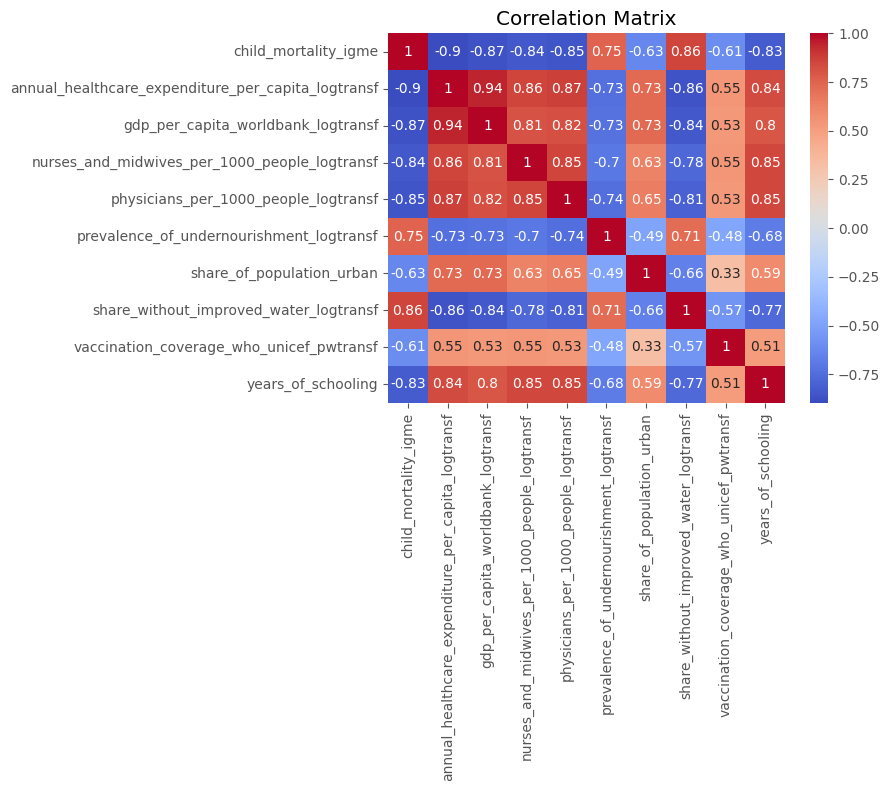

In [26]:
features_corr = rel_pwtr.copy()
features_corr["child_mortality_igme"] = df_transformed0["child_mortality_igme"].values
#only_logtr = features_corr.filter(regex="logtransf|unicef_pwtransf")
#only_logtr = only_logtr.drop(columns=["vaccination_coverage_who_unicef_logtransf"])
cols_corr = ["child_mortality_igme", "annual_healthcare_expenditure_per_capita_logtransf", "gdp_per_capita_worldbank_logtransf", "nurses_and_midwives_per_1000_people_logtransf", 
                "physicians_per_1000_people_logtransf", "prevalence_of_undernourishment_logtransf", "share_of_population_urban", "share_without_improved_water_logtransf",
                "vaccination_coverage_who_unicef_pwtransf", "years_of_schooling"]

#only_logtr = only_logtr.drop(columns=["annual_healthcare_expenditure_per_capita_logtransf"])
corr_df = features_corr[cols_corr]
corr = corr_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

<Axes: xlabel='child_mortality_igme_logtransf', ylabel='ratio'>

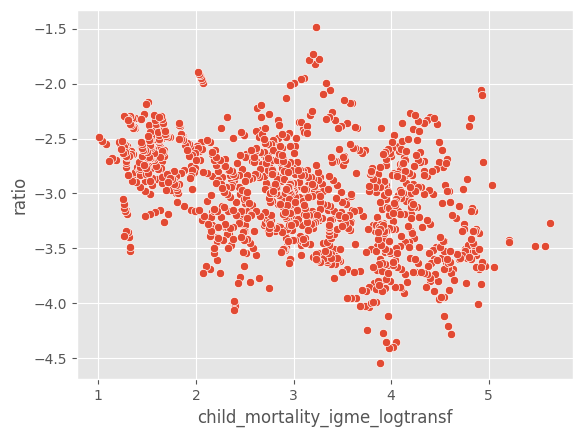

In [113]:
testt = only_logtr.copy()
testt["ratio"] = testt["annual_healthcare_expenditure_per_capita_logtransf"] - testt["gdp_per_capita_worldbank_logtransf"]
sns.scatterplot(data=testt, x="child_mortality_igme_logtransf", y="ratio")

In [17]:
corr_raw = rel_pwtr["vaccination_coverage_who_unicef"].corr(rel_pwtr["child_mortality_igme_logtransf"])
corr_trans = rel_pwtr["vaccination_coverage_who_unicef_pwtransf"].corr(rel_pwtr["child_mortality_igme_logtransf"])

print(f"Raw: {corr_raw:.4f}, Transformed: {corr_trans:.4f}")

Raw: -0.5715, Transformed: -0.6063


In [18]:
corr_raw_s = rel_pwtr["share_without_improved_water"].corr(rel_pwtr["child_mortality_igme_logtransf"])
corr_trans_s = rel_pwtr["share_without_improved_water_logtransf"].corr(rel_pwtr["child_mortality_igme_logtransf"])

print(f"Raw: {corr_raw_s:.4f}, Transformed: {corr_trans_s:.4f}")

Raw: 0.7634, Transformed: 0.8576


### Fixed Effects

In [70]:
df_fe = df_full_imp.copy()
num_vars = df_fe.select_dtypes(include=["float64"]).columns.to_list()

df_transf = df_fe.loc[:, df_fe.select_dtypes(include=["float64"]).columns].copy()

logp1_tr = np.log1p(df_transf) #PowerTransformer() 
#df_fe_tr = power_tr.fit_transform(df_transf)

scaler_fe = RobustScaler()
scale_data_fe = scaler_fe.fit_transform(logp1_tr)

df_transf = pd.DataFrame(
    scale_data_fe,
    columns=df_transf.columns
)
df_transf[["Code", "Entity", "Year"]] = df_fe[["Code", "Entity", "Year"]]

In [71]:
df_transf = pd.merge(df_transf, world_regions[["Entity", "World regions according to WB"]], on="Entity", how="left")

In [72]:
#create mean variables by group Entity & within transformed variables (original - mean)
for col in num_vars:
    df_transf[f"{col}_mean"] = df_transf.groupby("Entity")[col].transform("mean")
    df_transf[f"{col}_within"] = df_transf[col] - df_transf[f"{col}_mean"]
    df_transf[f"{col}_within_mean"] = df_transf[f"{col}_mean"] + df_transf[f"{col}_within"]
    #df_transf[f"{col}_within"] = df_transf[f"{col}_w_only"] + df_transf[f"{col}_mean"]

In [73]:
#mean_vars = df_fe.loc[:, df_fe.columns.str.contains("mean")]
#within_tr_vars = df_fe.loc[:, df_fe.columns.str.contains("within")]
numerics = df_transf.select_dtypes(include=["float64"]).columns
mean_vars = numerics[numerics.str.contains("mean")]
within_tr_vars = numerics[numerics.str.contains("within")]

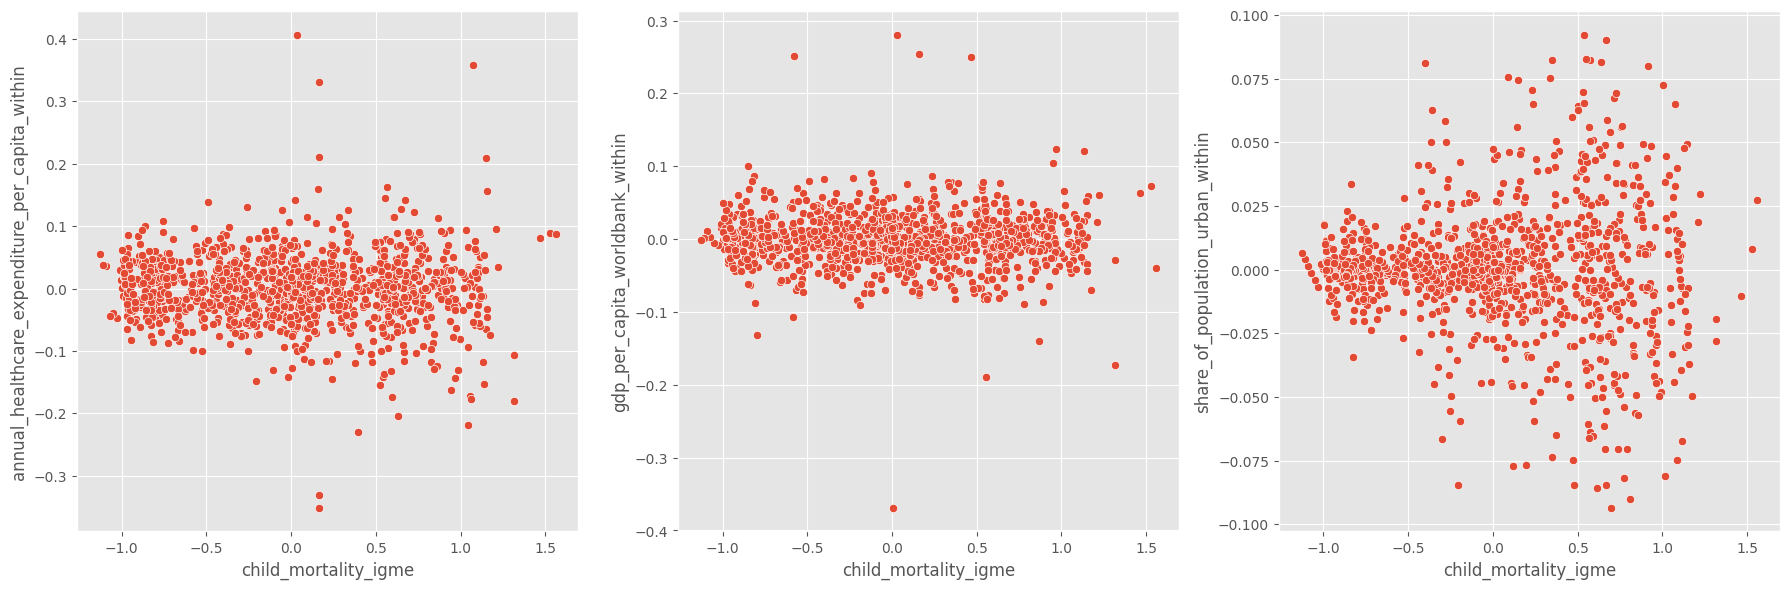

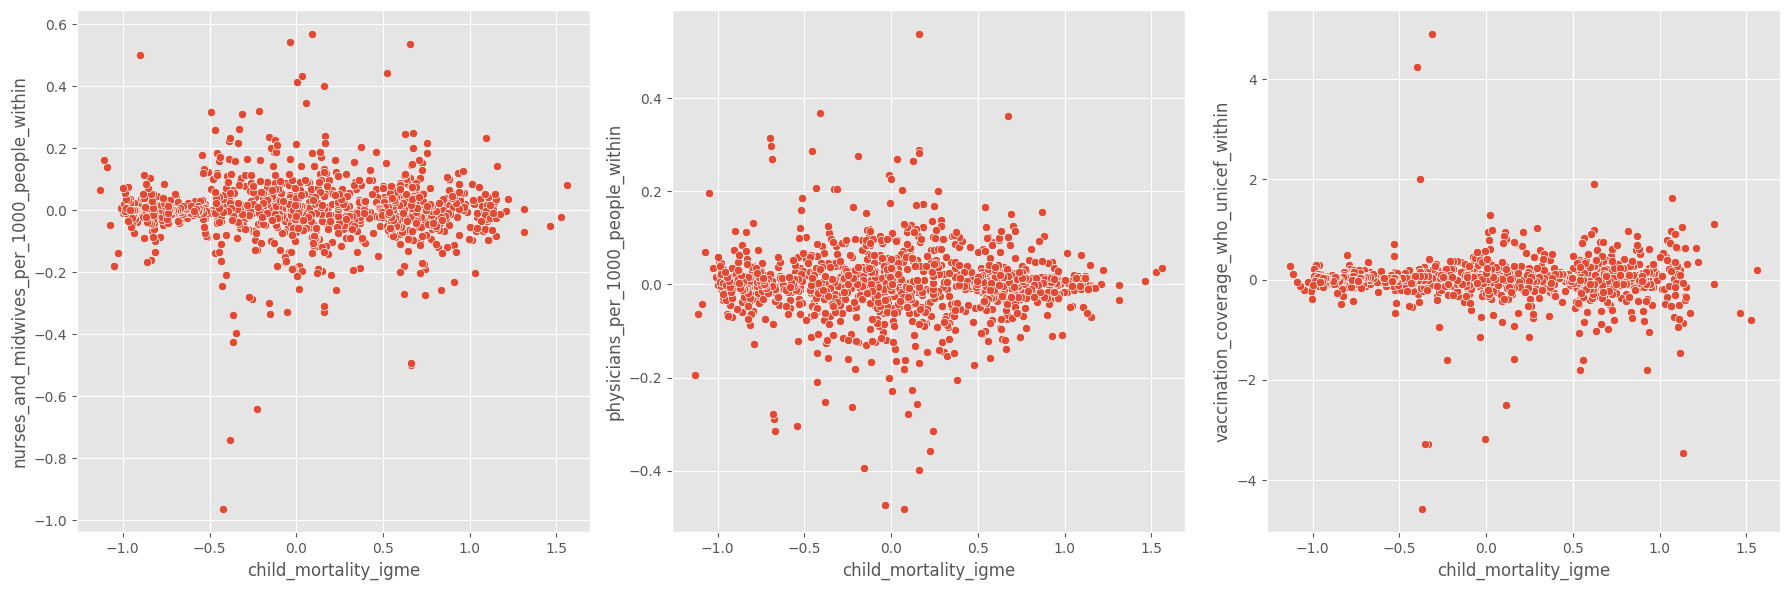

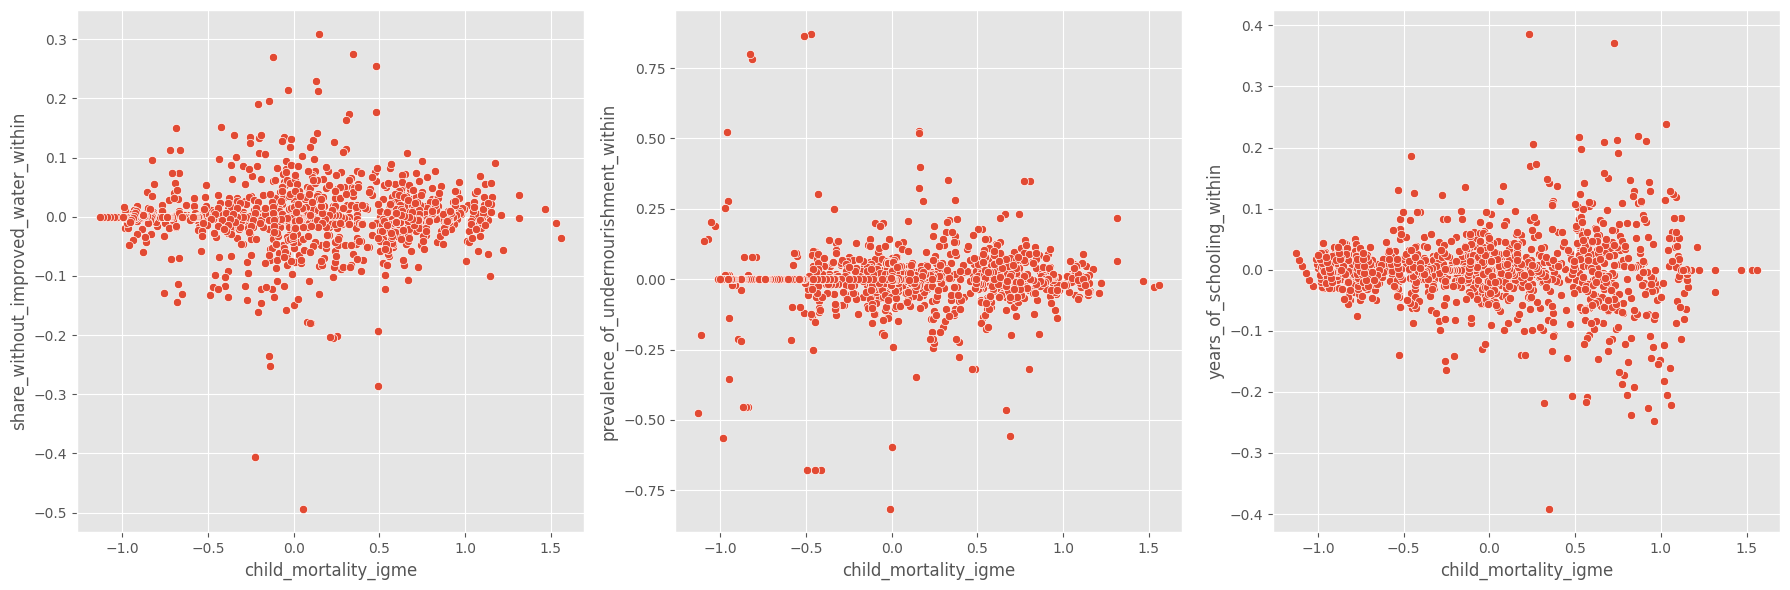

In [74]:
# ----------------------------------
# Show Features - Target Relationship 
# 
#-----------------------------------

def scatterplots_within(df, features, cols_num):
    fig, axs = plt.subplots(ncols=cols_num, figsize=(18, 6))
    for id, a in enumerate(axs):
        sns.scatterplot(data=df, x="child_mortality_igme", y=features[id], ax=axs[id])
    plt.tight_layout()
    plt.show()

#rel_pwtr['vacc_squared'] = rel_pwtr['vaccination_coverage_who_unicef']**2

scatterplots_within(df_transf, ["annual_healthcare_expenditure_per_capita_within", "gdp_per_capita_worldbank_within", "share_of_population_urban_within"], 3)
scatterplots_within(df_transf, ["nurses_and_midwives_per_1000_people_within", "physicians_per_1000_people_within", "vaccination_coverage_who_unicef_within"], 3)
scatterplots_within(df_transf, ["share_without_improved_water_within", "prevalence_of_undernourishment_within", "years_of_schooling_within"], 3)

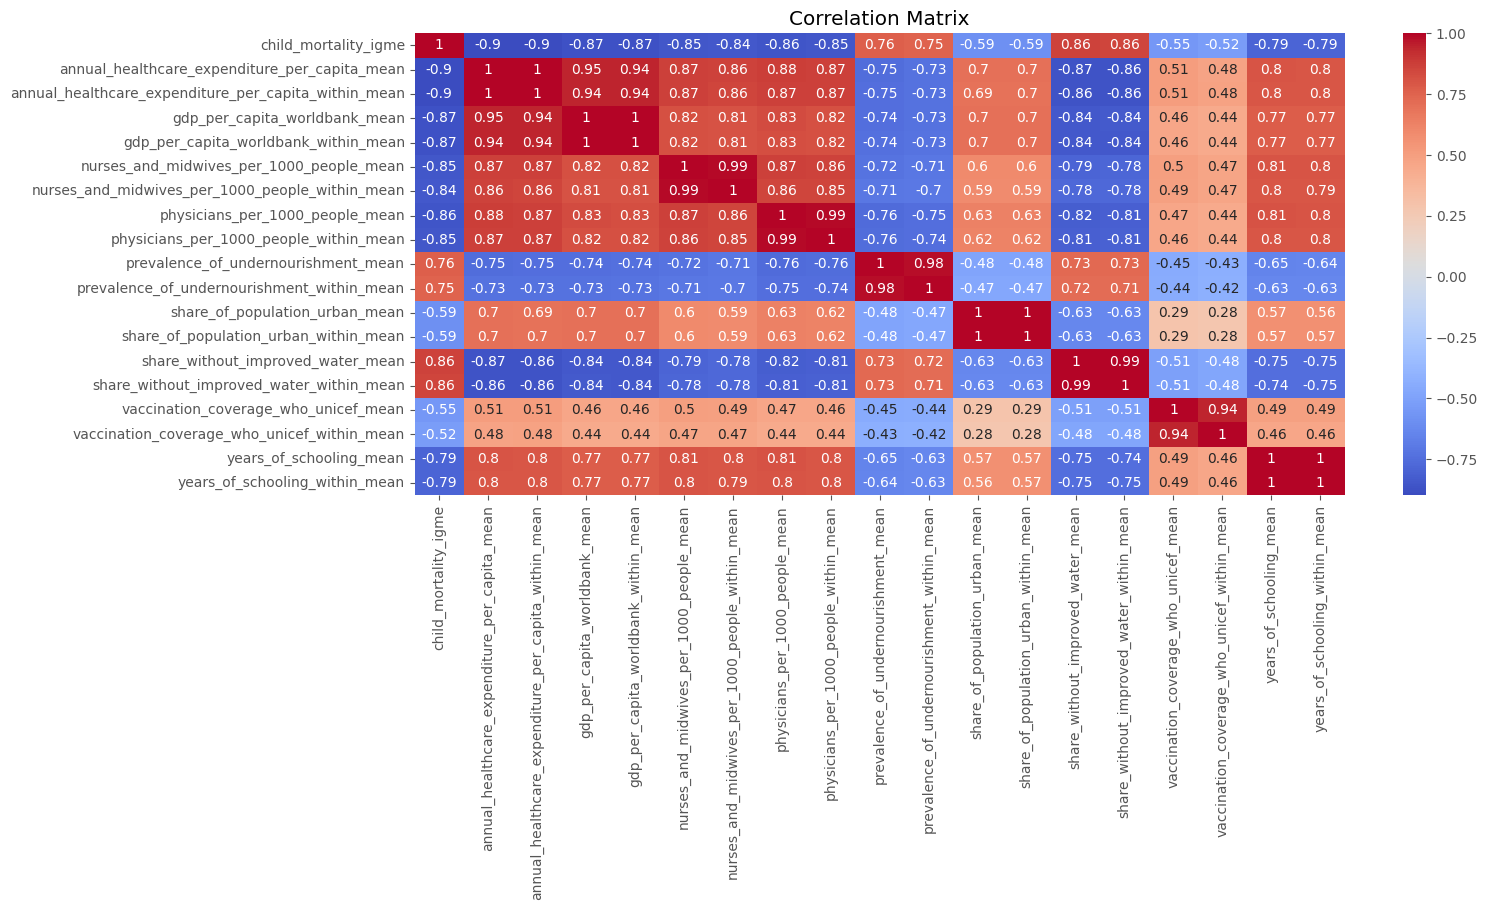

In [80]:
features_correl = df_transf.copy()
features_correl = features_correl.drop(columns=["child_mortality_igme_mean", "child_mortality_igme_within", "child_mortality_igme_within_mean"])
only_logtr_within = features_correl.filter(regex="_igme|mean")

corr_within = only_logtr_within.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(corr_within, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = only_logtr[['gdp_per_capita_worldbank_logtransf', 'nurses_and_midwives_per_1000_people_logtransf', 'physicians_per_1000_people_logtransf', 'prevalence_of_undernourishment_logtransf', 'share_of_population_urban_logtransf', 'share_without_improved_water_logtransf', 'vaccination_coverage_who_unicef_logtransf', 'years_of_schooling_logtransf']]

X_with_const = add_constant(X)

# 3. VIF für jedes Feature berechnen
vif_data = pd.DataFrame()
vif_data["feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(len(X_with_const.columns))]

print(vif_data.sort_values(by="VIF", ascending=False))

                                         feature          VIF
0                                          const  1204.534967
1             gdp_per_capita_worldbank_logtransf     5.488002
3           physicians_per_1000_people_logtransf     5.459334
2  nurses_and_midwives_per_1000_people_logtransf     4.708059
6         share_without_improved_water_logtransf     4.269490
8                   years_of_schooling_logtransf     3.444487
4       prevalence_of_undernourishment_logtransf     2.605166
5            share_of_population_urban_logtransf     2.042108
7      vaccination_coverage_who_unicef_logtransf     1.371329
